In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,9)

Using TensorFlow backend.


In [5]:
data = pd.read_csv("sine_wave_timeseries_data.csv",);
data = data[["value"]]

labels = data[1:20000]
data = data[0:19999]
train_size = int(float(data.shape[0])*0.50)
X_train,X_test = data[0:train_size].values,data[train_size:].values
y_train,y_test = labels[0:train_size].values,labels[train_size:].values


 7488/10000 [=====================>........] - ETA: 0sAccuracy [5.8558341600837593e-05, 5.8558341600837593e-05]


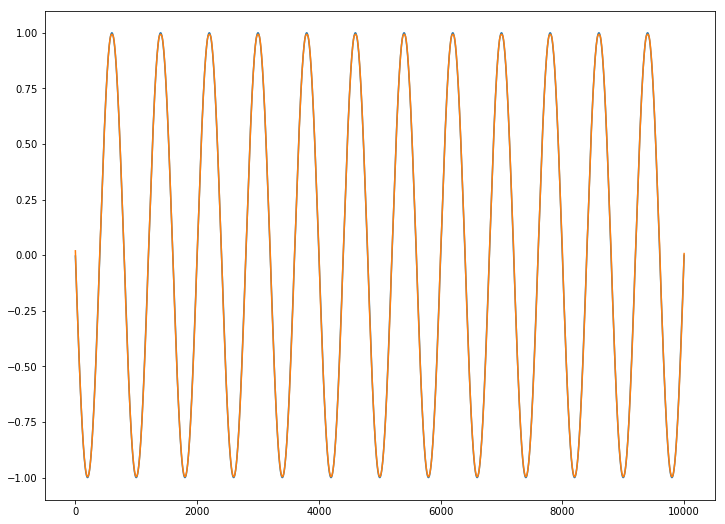

In [14]:
model = Sequential()
model.add(Dense(10,input_dim=1,activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(loss='mse', optimizer='adam',metrics=['mse'])

history = model.fit(X_train, y_train, epochs=200, batch_size=1000,verbose=0)
score = model.evaluate(X_test,y_test)
p = model.predict(X_test, batch_size=50)
plt.plot(y_test)
plt.plot(p)
print("Accuracy", score)

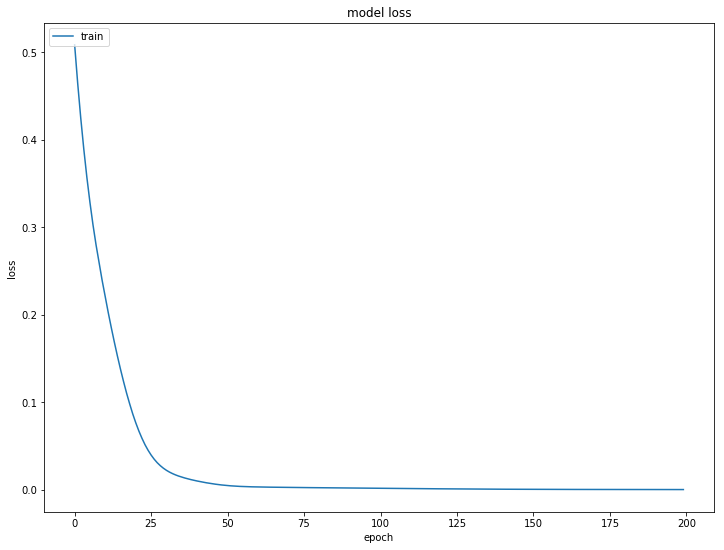

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history)